In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("./상권변화지표.csv")

In [10]:
data.head()

,Unnamed: 0,년도,분기,행정구역,개업률,폐업률,신생 1 생존률,신생 3 생존률,신생 5 생존률,1 생존률,...,5 생존률,주거 인구,직장 인구,임대료,전체 점포수,프랜차이즈 점포수,일반 점포수,최근 10년 평균영업기간,최근 30년 평균영업기간,상권변화지표
0,0,2016,3,종로구,3.9,4.3,74.7,46.8,30.2,73.7,...,31.3,62,125,142788,7088,958,6130,3.1,5.1,정체
1,1,2016,3,중구,3.5,3.9,73.0,47.4,37.3,78.4,...,37.4,110,517,188434,6683,1079,5604,3.2,5.3,정체
2,2,2016,3,용산구,4.6,4.6,74.3,44.3,33.4,72.6,...,32.1,97,72,100920,4909,638,4271,3.0,4.7,정체
3,3,2016,3,성동구,5.2,5.2,67.4,46.8,31.5,74.4,...,32.3,150,101,85570,3807,675,3132,3.0,4.7,정체
4,4,2016,3,광진구,4.4,5.1,71.4,38.4,26.4,71.8,...,25.4,197,45,88334,5216,975,4241,3.0,4.5,다이나믹


In [11]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head(n=10)

,년도,분기,행정구역,개업률,폐업률,신생 1 생존률,신생 3 생존률,신생 5 생존률,1 생존률,3 생존률,5 생존률,주거 인구,직장 인구,임대료,전체 점포수,프랜차이즈 점포수,일반 점포수,최근 10년 평균영업기간,최근 30년 평균영업기간,상권변화지표
0,2016,3,종로구,3.9,4.3,74.7,46.8,30.2,73.7,45.5,31.3,62,125,142788,7088,958,6130,3.1,5.1,정체
1,2016,3,중구,3.5,3.9,73.0,47.4,37.3,78.4,52.3,37.4,110,517,188434,6683,1079,5604,3.2,5.3,정체
2,2016,3,용산구,4.6,4.6,74.3,44.3,33.4,72.6,46.7,32.1,97,72,100920,4909,638,4271,3.0,4.7,정체
3,2016,3,성동구,5.2,5.2,67.4,46.8,31.5,74.4,47.1,32.3,150,101,85570,3807,675,3132,3.0,4.7,정체
4,2016,3,광진구,4.4,5.1,71.4,38.4,26.4,71.8,40.9,25.4,197,45,88334,5216,975,4241,3.0,4.5,다이나믹
5,2016,3,동대문구,4.4,5.3,68.7,39.7,27.9,69.9,41.6,25.9,222,61,72353,5286,839,4447,3.0,4.6,정체
6,2016,3,중랑구,4.3,5.3,65.6,31.6,26.0,66.0,36.9,23.9,208,28,70858,4508,699,3809,2.8,4.3,다이나믹
7,2016,3,성북구,4.8,5.3,70.8,39.4,25.1,71.2,41.0,24.8,152,25,79324,4920,857,4063,3.0,4.6,정체
8,2016,3,강북구,5.4,5.6,68.6,35.9,24.5,67.5,38.7,25.2,126,14,76806,4089,573,3516,2.9,4.4,다이나믹
9,2016,3,도봉구,4.6,5.5,66.7,34.9,23.8,73.2,42.3,25.8,152,19,78221,3124,489,2635,2.9,4.5,다이나믹


# 변수 1 : 개업률

In [80]:
x1 = data.loc[:,["년도","분기","행정구역","개업률"]]
x1.columns = ["year","period","region","open"]
x1["date"] = 0

for i in range(0,len(x1)):
    x1["date"][i] = str(x1.loc[:,"year"][i])+str("-")+str(x1.loc[:,'period'][i])
x1

,year,period,region,open,date
0,2016,3,종로구,3.9,2016-3
1,2016,3,중구,3.5,2016-3
2,2016,3,용산구,4.6,2016-3
3,2016,3,성동구,5.2,2016-3
4,2016,3,광진구,4.4,2016-3
...,...,...,...,...,...
495,2021,2,관악구,5.3,2021-2
496,2021,2,서초구,3.6,2021-2
497,2021,2,강남구,4.8,2021-2
498,2021,2,송파구,4.6,2021-2


## 개업률 시계열도

In [82]:
## 지역구 변수 생성
region = list(set(x1.region))
print(len(region))
region

25


['동대문구',
 '강북구',
 '중랑구',
 '서대문구',
 '광진구',
 '양천구',
 '용산구',
 '관악구',
 '서초구',
 '강서구',
 '은평구',
 '송파구',
 '영등포구',
 '동작구',
 '금천구',
 '중구',
 '성동구',
 '도봉구',
 '강동구',
 '구로구',
 '종로구',
 '성북구',
 '노원구',
 '마포구',
 '강남구']

In [48]:
date = []
date = ["2016-3","2016-4"]
for i in range(17,21):
    for j in range(1,5):
        date.append(str("20"+str(i)+"-"+str(j)))
date.append("2021-1")
date.append("2021-2")
date

['2016-3',
 '2016-4',
 '2017-1',
 '2017-2',
 '2017-3',
 '2017-4',
 '2018-1',
 '2018-2',
 '2018-3',
 '2018-4',
 '2019-1',
 '2019-2',
 '2019-3',
 '2019-4',
 '2020-1',
 '2020-2',
 '2020-3',
 '2020-4',
 '2021-1',
 '2021-2']

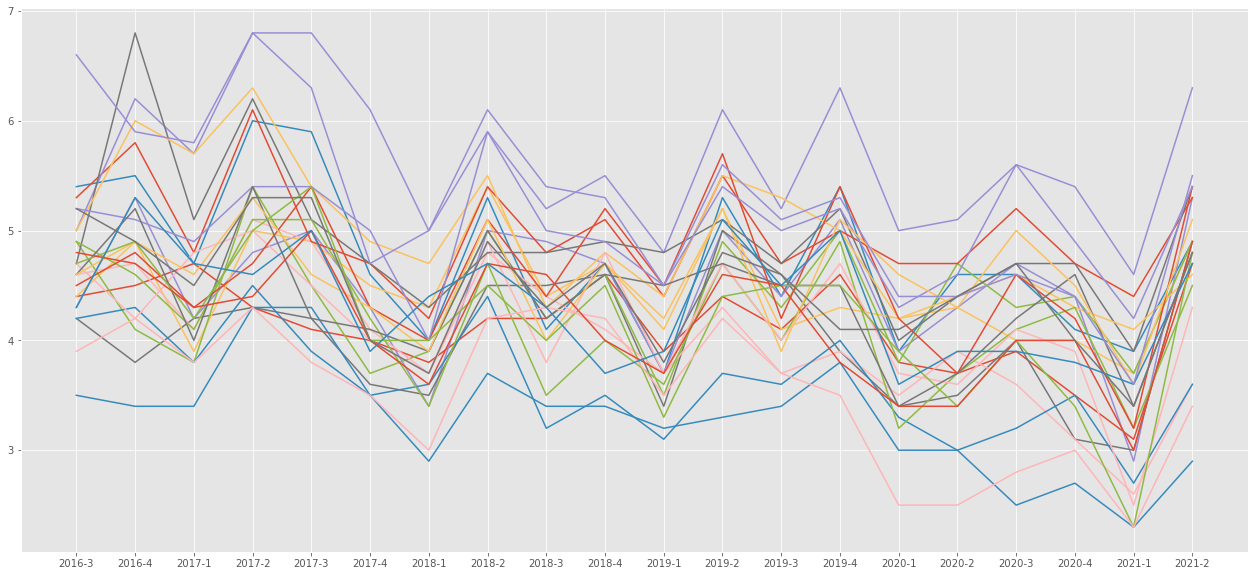

In [78]:
plt.figure(figsize=(22,10))
for i in range(0,25):
    plt.plot(date, x1.open[x1.region == region[i]])

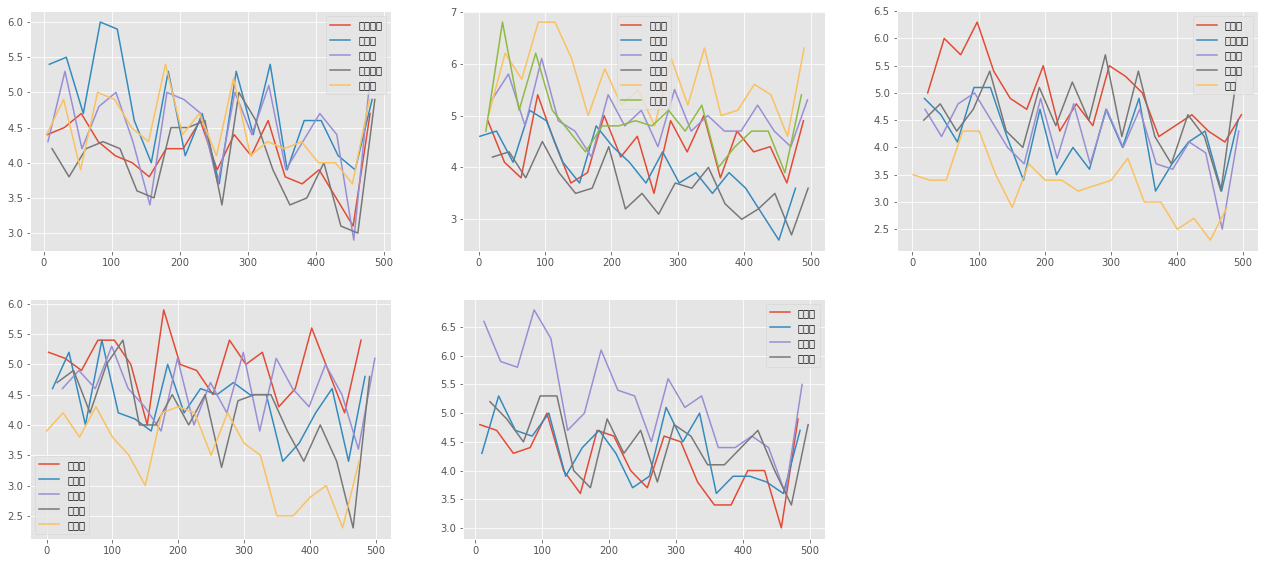

In [75]:
plt.figure(figsize=(22,15))
for i in range(0,5):
    plt.subplot(3, 3, 1)
    plt.plot(x1.open[x1.region == region[i]],label=region[i])
    plt.legend()

for i in range(5,11):
    plt.subplot(3, 3, 2)
    plt.plot(x1.open[x1.region == region[i]],label=region[i])
    plt.legend()
    
for i in range(11,16):
    plt.subplot(3, 3, 3)
    plt.plot(x1.open[x1.region == region[i]],label=region[i])
    plt.legend()
    
for i in range(16,21):
    plt.subplot(3, 3, 4)
    plt.plot(x1.open[x1.region == region[i]],label=region[i])
    plt.legend()
    
for i in range(21,25):
    plt.subplot(3, 3, 5)
    plt.plot(x1.open[x1.region == region[i]],label=region[i])
    plt.legend()


## 분기별 추세

In [119]:
## 더미변수 생성
## 분기 더미변수
dummy = pd.get_dummies(x1.loc[:,"period"])
dummy_1 = dummy.loc[:,1]
dummy_2 = dummy.loc[:,2]
dummy_3 = dummy.loc[:,3]

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: 1, Length: 500, dtype: uint8

In [146]:
dummy2 = pd.get_dummies(x1.loc[:,"year"])
dummy2_1 = dummy2.loc[:,2016]
dummy2_2 = dummy2.loc[:,2017]
dummy2_3 = dummy2.loc[:,2018]
dummy2_4 = dummy2.loc[:,2019]
dummy2_5 = dummy2.loc[:,2020]

In [189]:
from sklearn.model_selection import train_test_split

y = x1.open
x = [dummy_1,dummy_2,dummy_3,dummy2_1,dummy2_2,dummy2_3,dummy2_4,dummy2_5]

x = np.array(x)
x = x.transpose()
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
## 학습(train) 데이터와 시험(test) 데이터 분리

In [190]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [164]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [165]:
lr.coef_

array([-0.42158982,  0.37979971,  0.04785972,  0.85531021,  0.76413278,
        0.47264622,  0.45540456,  0.01787996])

In [166]:
lr.intercept_

4.002338878056629

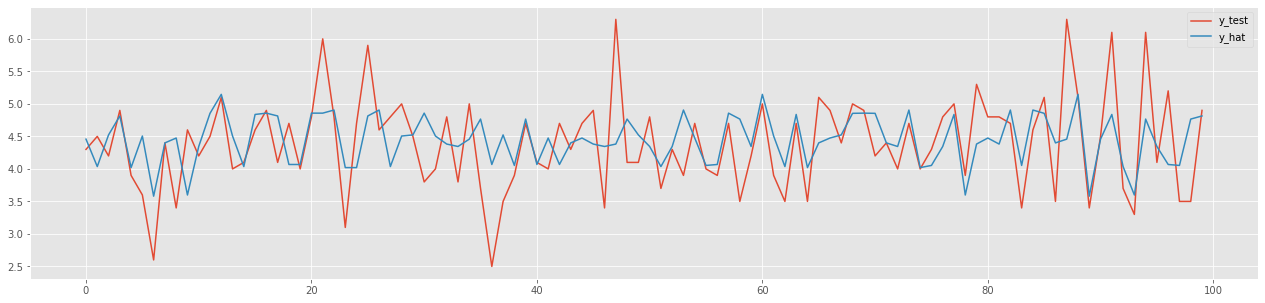

In [167]:
y_hat = lr.predict(x_test)

plt.figure(figsize=(22,5))
plt.plot(y_test,label="y_test")
plt.plot(y_hat, label="y_hat")
plt.legend()
plt.show()

In [175]:
e_hat = y_test - y_hat

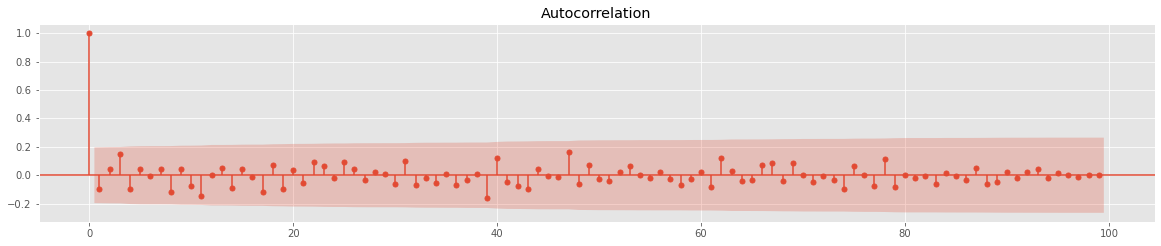

In [185]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(e_hat,lags=99,ax=ax1)

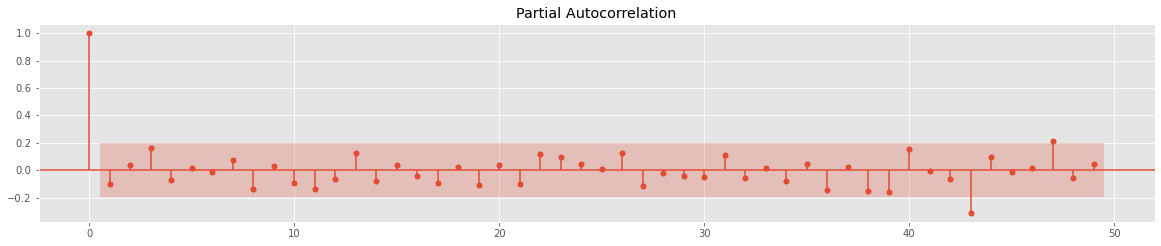

In [186]:
fig = plt.figure(figsize=(20,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(e_hat,lags=49,ax=ax2)

In [194]:
## 예측
loc = [[0,0,1,0,0,0,0,0]]
mlr.predict(loc)

array([4.09056426])

In [203]:
dummy = pd.get_dummies(x1[x1.region==region[1]].loc[:,"period"])
dummy_1 = dummy.loc[:,1]
dummy_2 = dummy.loc[:,2]
dummy_3 = dummy.loc[:,3]

In [217]:
predict=[]
for i in range(0,25):
    
    dummy = pd.get_dummies(x1[x1.region==region[i]].loc[:,"period"])
    dummy_1 = dummy.loc[:,1]
    dummy_2 = dummy.loc[:,2]
    dummy_3 = dummy.loc[:,3]
    
    dummy2 = pd.get_dummies(x1[x1.region==region[i]].loc[:,"year"])
    dummy2_1 = dummy2.loc[:,2016]
    dummy2_2 = dummy2.loc[:,2017]
    dummy2_3 = dummy2.loc[:,2018]
    dummy2_4 = dummy2.loc[:,2019]
    dummy2_5 = dummy2.loc[:,2020]
    
    y = x1.open[x1.region==region[i]]
    x = [dummy_1,dummy_2,dummy_3,dummy2_1,dummy2_2,dummy2_3,dummy2_4,dummy2_5]
    
    x = np.array(x)
    x = x.transpose()
    y = np.array(y)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
    
    loc = [[0,0,1,0,0,0,0,0]]
    predict.append(mlr.predict(loc))

In [222]:
result = pd.DataFrame({"region" : region, "2021-3 predict" : predict})
result

,region,2021-3 predict
0,동대문구,[4.090564259105284]
1,강북구,[4.090564259105284]
2,중랑구,[4.090564259105284]
3,서대문구,[4.090564259105284]
4,광진구,[4.090564259105284]
5,양천구,[4.090564259105284]
6,용산구,[4.090564259105284]
7,관악구,[4.090564259105284]
8,서초구,[4.090564259105284]
9,강서구,[4.090564259105284]


----